# Helicopter experiment

### Xander Mol, December 2020

## Loading and exploring data

### Reading datafile

In [31]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Reading data and previewing data
flightdata=pd.read_csv('Xander Mol Helicopter Experiment data.csv', index_col=0)
flightdata

,PAPERCOLOR,PAPERCLIPS,FLIGHTTIME
OBSERVATION,,,
1,Y,0,1.32
2,Y,0,1.61
3,Y,0,1.25
4,Y,0,1.32
5,B,0,2.56
6,B,0,2.23
7,B,0,2.12
8,B,0,2.30
9,R,0,1.22


### Analysing data

In [3]:
flightdata.describe()

,PAPERCLIPS,FLIGHTTIME
count,36.000000,36.000000
mean,1.000000,1.784444
std,0.828079,0.352594
min,0.000000,1.220000
25%,0.000000,1.530000
50%,1.000000,1.680000
75%,2.000000,2.122500
max,2.000000,2.560000


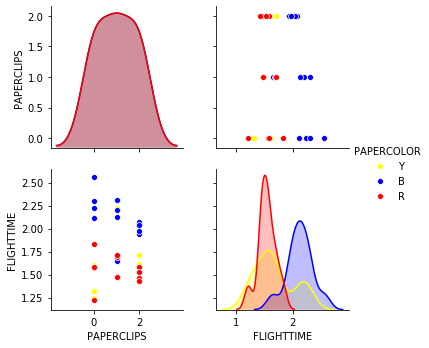

In [4]:
palette ={"Y": "yellow", "B": "blue", "R": "red"}
sns.pairplot(flightdata, hue="PAPERCOLOR", palette = palette)

### One hot encoding of paper color

In [5]:
#One hot encoding of paper color
flightdata_onehot = pd.get_dummies(flightdata[['PAPERCOLOR']], prefix="", prefix_sep="")
flightdata_onehot['PAPERCLIPS'] = flightdata['PAPERCLIPS']
flightdata_onehot['FLIGHTTIME'] = flightdata['FLIGHTTIME']
flightdata_onehot

,B,R,Y,PAPERCLIPS,FLIGHTTIME
OBSERVATION,,,,,
1,0,0,1,0,1.32
2,0,0,1,0,1.61
3,0,0,1,0,1.25
4,0,0,1,0,1.32
5,1,0,0,0,2.56
6,1,0,0,0,2.23
7,1,0,0,0,2.12
8,1,0,0,0,2.30
9,0,1,0,0,1.22


### Scatter plot grid

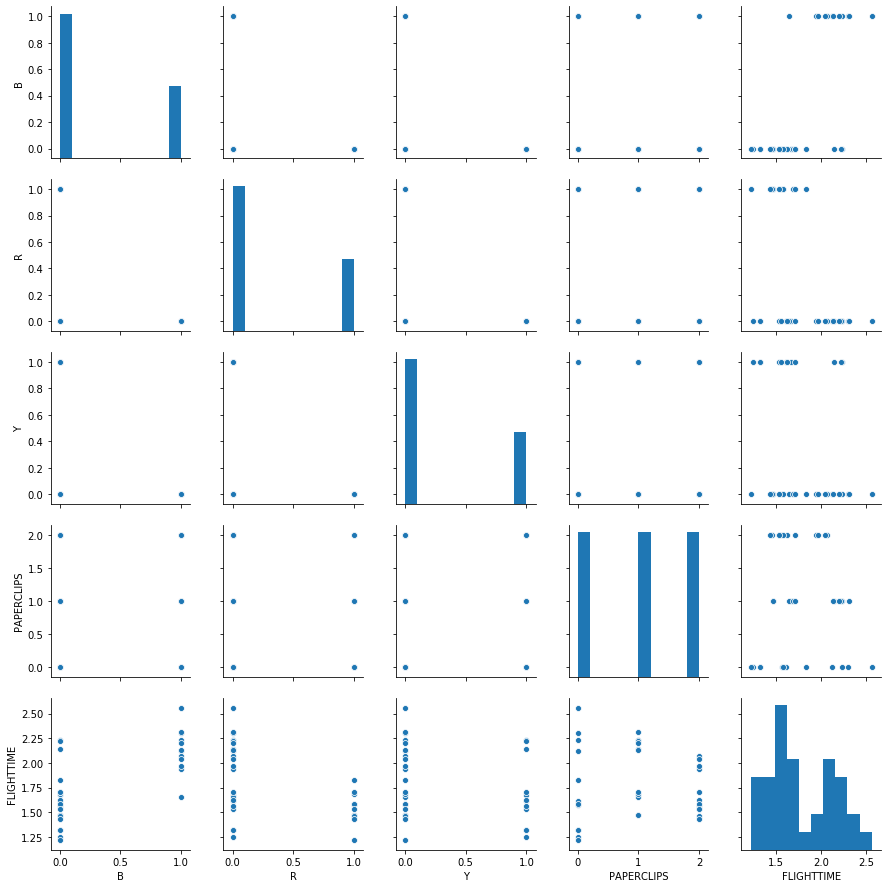

In [6]:
sns.pairplot(flightdata_onehot)

### Correlation matrix heatmap

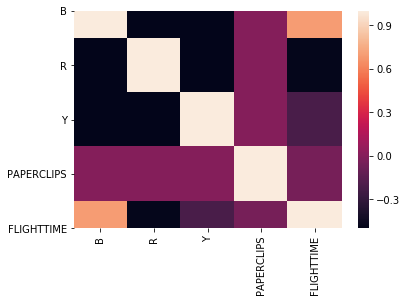

In [7]:
sns.heatmap(flightdata_onehot.corr())

## Regression analysis: Predict flight time based on paper color and number of paperclips

### Set up the dependent and the independent variables

In [8]:
X = pd.DataFrame(flightdata_onehot.iloc[:,:-1])
X

,B,R,Y,PAPERCLIPS
OBSERVATION,,,,
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,1,0,0


In [9]:
y=pd.DataFrame(flightdata_onehot.iloc[:,-1])
y

,FLIGHTTIME
OBSERVATION,
1,1.32
2,1.61
3,1.25
4,1.32
5,2.56
6,2.23
7,2.12
8,2.30
9,1.22


### Divide data into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 4)
(8, 4)
(28, 1)
(8, 1)


### Train regression model

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,B,0.360667
1,R,-0.293833
2,Y,-0.066833
3,PAPERCLIPS,-0.055000


### Comparing predicted values with actual values

In [13]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,2.1375
1,1.5380
2,1.8200
3,2.1925
4,1.5380
5,2.2475
6,1.8200
7,2.1925


In [14]:
y_test

,FLIGHTTIME
OBSERVATION,
32,1.97
23,1.69
4,1.32
19,1.65
21,1.47
6,2.23
1,1.32
20,2.13


### Evaluate by metrics

In [15]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error 0.25125000000000003
Mean Squared Error 0.106787875
Root Mean Squared Error 0.3267841412920768


## Cluster prediction: Predict paper color on flight time and number of paperclips

### Set up the dependent and the independent variables

In [16]:
#Set X values as numpy array
X2=flightdata[['PAPERCLIPS', 'FLIGHTTIME']].values
X2

array([[0.  , 1.32],
       [0.  , 1.61],
       [0.  , 1.25],
       [0.  , 1.32],
       [0.  , 2.56],
       [0.  , 2.23],
       [0.  , 2.12],
       [0.  , 2.3 ],
       [0.  , 1.22],
       [0.  , 1.57],
       [0.  , 1.83],
       [0.  , 1.58],
       [1.  , 2.23],
       [1.  , 2.14],
       [1.  , 2.22],
       [1.  , 1.67],
       [1.  , 2.31],
       [1.  , 2.2 ],
       [1.  , 1.65],
       [1.  , 2.13],
       [1.  , 1.47],
       [1.  , 1.47],
       [1.  , 1.69],
       [1.  , 1.71],
       [2.  , 1.53],
       [2.  , 1.62],
       [2.  , 1.56],
       [2.  , 1.71],
       [2.  , 1.94],
       [2.  , 2.07],
       [2.  , 2.04],
       [2.  , 1.97],
       [2.  , 1.46],
       [2.  , 1.43],
       [2.  , 1.58],
       [2.  , 1.53]])

In [17]:
#Set Y values as numpy array
y2=flightdata['PAPERCOLOR'].values
y2

array(['Y', 'Y', 'Y', 'Y', 'B', 'B', 'B', 'B', 'R', 'R', 'R', 'R', 'Y',
       'Y', 'Y', 'Y', 'B', 'B', 'B', 'B', 'R', 'R', 'R', 'R', 'Y', 'Y',
       'Y', 'Y', 'B', 'B', 'B', 'B', 'R', 'R', 'R', 'R'], dtype=object)

### Divide data into train and test sets

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=5)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(28, 2)
(8, 2)
(28,)
(8,)


### Train cluster model based on KNeighbors

In [19]:
clusters = KNeighborsClassifier(n_neighbors = 3).fit(X2_train,y2_train)
clusters

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Comparing predicted values with actual values

In [20]:
y2_pred = clusters.predict(X2_test)
y2_pred

array(['B', 'R', 'R', 'R', 'R', 'B', 'R', 'Y'], dtype=object)

In [21]:
y2_test

array(['B', 'R', 'Y', 'B', 'R', 'B', 'Y', 'B'], dtype=object)

### Evaluate by metrics

In [22]:
print("Train set Accuracy: ", metrics.accuracy_score(y2_train, clusters.predict(X2_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, y2_pred))

Train set Accuracy:  0.75
Test set Accuracy:  0.5


### Train cluster model based on Decision Tree

In [35]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X2_train, y2_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Comparing predicted values with actual values

In [36]:
y2_pred2 = tree.predict(X2_test)
y2_pred2

array(['B', 'R', 'R', 'Y', 'R', 'Y', 'R', 'B'], dtype=object)

In [37]:
y2_test

array(['B', 'R', 'Y', 'B', 'R', 'B', 'Y', 'B'], dtype=object)

### Evaluate by metrics

In [38]:
print("Train set Accuracy: ", metrics.accuracy_score(y2_train, tree.predict(X2_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, y2_pred2))

Train set Accuracy:  0.8928571428571429
Test set Accuracy:  0.5


## Regression analysis: Predict number of paperclips based on paper color and flighttime

### Set up the dependent and the independent variables

In [23]:
X3 = flightdata_onehot[['B', 'R', 'Y', 'FLIGHTTIME']]
X3

,B,R,Y,FLIGHTTIME
OBSERVATION,,,,
1,0,0,1,1.32
2,0,0,1,1.61
3,0,0,1,1.25
4,0,0,1,1.32
5,1,0,0,2.56
6,1,0,0,2.23
7,1,0,0,2.12
8,1,0,0,2.30
9,0,1,0,1.22


In [24]:
y3 = flightdata_onehot[['PAPERCLIPS']]
y3

,PAPERCLIPS
OBSERVATION,
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Divide data into train and test sets

In [25]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=5)
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(28, 4)
(8, 4)
(28, 1)
(8, 1)


### Train regression model

In [26]:
regressor2 = LinearRegression()
regressor2.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
v2 = pd.DataFrame(regressor2.coef_,index=['Co-efficient']).transpose()
w2 = pd.DataFrame(X3.columns, columns=['Attribute'])
coeff_df2 = pd.concat([w2,v2], axis=1, join='inner')
coeff_df2

,Attribute,Co-efficient
0,B,0.196404
1,R,-0.276185
2,Y,0.079781
3,FLIGHTTIME,-0.722060


### Comparing predicted values with actual values

In [28]:
y3_pred = regressor2.predict(X3_test)
y3_pred = pd.DataFrame(y3_pred, columns=['Predicted'])
y3_pred

,Predicted
0,1.160658
1,0.890247
2,1.513374
3,1.391718
4,1.049100
5,0.972923
6,1.513374
7,1.045129


In [29]:
y3_test

,PAPERCLIPS
OBSERVATION,
32,2
23,1
4,0
19,1
21,1
6,0
1,0
20,1


### Evaluate by metrics

In [30]:
print('Mean Absolute Error', metrics.mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error', metrics.mean_squared_error(y3_test, y3_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Mean Absolute Error 0.679339060249841
Mean Squared Error 0.8002014737347746
Root Mean Squared Error 0.8945398111513957
